# PCA and Clustering: hands-on practice

Let's play around with pre-baked clustering algorithms on various example datasets.

The closest Klick benefit to this is to the Sivextro market archetyping project, which is essentially clustering.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Dataset 0: manually generated example data

Let's literally hand-write some examples and see what PCA and clustering feel like.

We'll start with data tightly scattered about the line $y = x$, with more data in the first quadrant than in the third.

In [2]:
X = np.array([[-5, -5], 
              [-2, -3], 
              [-1, -1],
              [0, 1], 
              [1, 0],
              [2, 2],
              [3, 3],
              [5, 4], 
              [5, 5],
              [6, 6],
              [7, 8],
              [10, 9],
              [11, 12]])

In [3]:
pca_2comp = PCA(n_components=2)

In [4]:
pca_2comp.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print pca_2comp.explained_variance_ratio_

[0.9940889 0.0059111]


Okay, the first principal component explains the vast majority of variance. Makes sense, since we manually distributed the samples along a straight line with pretty low variance around it.

In [6]:
print pca_2comp.singular_values_

[23.38266226  1.80308229]


In [7]:
print pca_2comp.components_

[[ 0.69305617  0.72088358]
 [-0.72088358  0.69305617]]


We've just diagonalized the nvar-by-nvar covariance matrix:

$C = VLV^{T}$,

where $V$ is a matrix of eigenvectors (eigenvecs as columns), and $L$ is a diagonal matrix of eigenvalues, in *decreasing* order. These eigenvalues are our **principal components**, which are the lengths of the eigenvectors that point along the **principal axes** or **principal directions** of the data.

Further very important reading:

https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

Let's confirm the eigenvalue and eigenvector picture graphically.

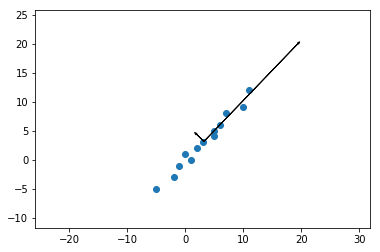

In [8]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
x0 = X[:,0].mean()
y0 = X[:,1].mean()
for sv, c in zip(pca_2comp.singular_values_, pca_2comp.components_):
    cx = c[0]*sv
    cy = c[1]*sv
    ax.arrow(x0, y0, cx, cy, head_width=0.3)
plt.axis('equal')
# My terrible plot code assumes negative minimum values.
ax.set_ylim(2*ax.get_ylim()[0], 2*ax.get_ylim()[1]);

Cool. Now, what if we do PCA with only one component? Should we just get the first eigenvector and eigenvalue?

In [9]:
pca_1comp = PCA(n_components=1)

In [10]:
pca_1comp.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print pca_1comp.explained_variance_ratio_

[0.9940889]


In [12]:
print pca_1comp.singular_values_

[23.38266226]


In [13]:
print pca_1comp.components_

[[0.69305617 0.72088358]]


Exactly as expected, we've found a single rotated direction along which variance is maximum. Our eigenvector matrix is just a single 2x1 column, and the eigenvalue matrix contains only one element.

In [14]:
pca_2comp.score_samples(X)

array([-4.71376216, -4.25833547, -3.53391103, -4.54291224, -3.87041786,
       -3.13976181, -3.10185286, -4.00751324, -3.16624615, -3.26854838,
       -4.26300917, -5.23046633, -5.1312799 ])

# Dataset 1: Irises

Let's follow the official sklearn tutorial here: http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html

In [15]:
from sklearn import cluster, datasets
iris = datasets.load_iris()

In [16]:
type(iris)

sklearn.utils.Bunch

In [17]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [18]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let's do it.

In [20]:
X_iris = iris.data
y_iris = iris.target

## K-means clustering

Probably the most basic clustering algo. We need to specify the number of clusters. That's a rather serious shortcoming in the context of clustering markets / HCPs. But we gotta start somewhere.

Oh! Michael Li mentioned the **elbow method** of empirically choosing the right number of clusters. Might want to look into that toward the end of this section.

In [21]:
# We know there are 3 species. For HCPs, mayyybe we'll see in raw plots 
# that there are 6 or 10 or whatever clusters. Wishful thinking.
k_means = cluster.KMeans(n_clusters=3)

In [22]:
k_means.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
k_means.labels_.shape

(150,)

Inspect correspondence between the discovered cluster labels and the true species.

In [24]:
k_means.labels_[::10]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2], dtype=int32)

In [25]:
y_iris[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

For easier plot comparisons, let's clumsily swap 0 and 1 in the truth y_iris labels.

In [26]:
# lol
y_iris[y_iris == 1] = 3
y_iris[y_iris == 0] = 1
y_iris[y_iris == 3] = 0

In [27]:
k_means.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [28]:
# Use DataFrame for pretty printing
pd.DataFrame(data=k_means.cluster_centers_, 
             columns=iris.feature_names).rename_axis('Cluster Number', axis=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster Number,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


### 3D Plots

In [29]:
from mpl_toolkits.mplot3d import Axes3D

### Truth

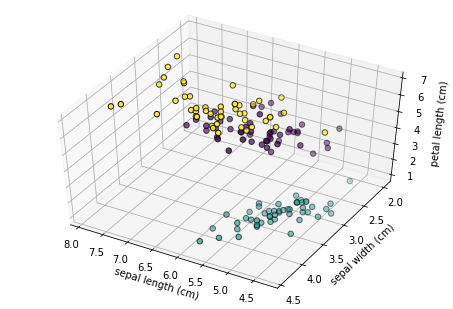

In [30]:
pltidx = np.array([0, 1, 2])
labels = y_iris
fig, ax = plt.subplots()
ax = Axes3D(fig, elev=48, azim=120)
ax.scatter(X_iris[:, pltidx[0]],
           X_iris[:, pltidx[1]],
           X_iris[:, pltidx[2]],
           c=labels.astype(float),
           edgecolor='k',
           s=30)
ax.set_xlabel(iris.feature_names[pltidx[0]])
ax.set_ylabel(iris.feature_names[pltidx[1]])
ax.set_zlabel(iris.feature_names[pltidx[2]]);
plt.show();

### K-Means results

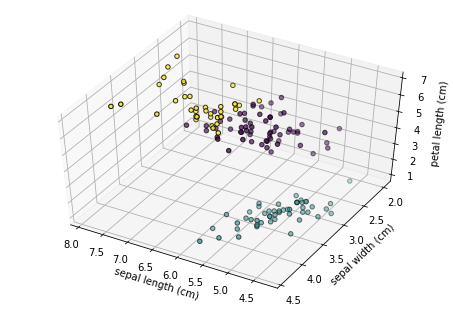

In [31]:
pltidx = np.array([0, 1, 2])
labels = k_means.labels_
fig, ax = plt.subplots()
ax = Axes3D(fig, elev=48, azim=120)
ax.scatter(X_iris[:, pltidx[0]],
           X_iris[:, pltidx[1]],
           X_iris[:, pltidx[2]],
           c=labels.astype(float),
           edgecolor='k')
ax.set_xlabel(iris.feature_names[pltidx[0]])
ax.set_ylabel(iris.feature_names[pltidx[1]])
ax.set_zlabel(iris.feature_names[pltidx[2]]);

# PCA, *then* k-means

Based on this, we want to turn on PCA whitening, since k-means makes strong assumptions about the isotropy of the signal.

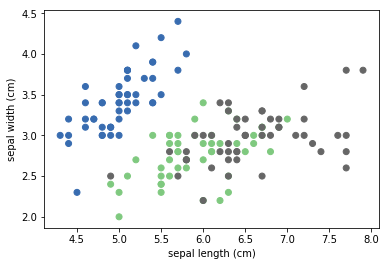

In [32]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=plt.cm.Accent)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [33]:
# Here we go!
X_iris_reduced = PCA(n_components=2).fit_transform(X_iris);

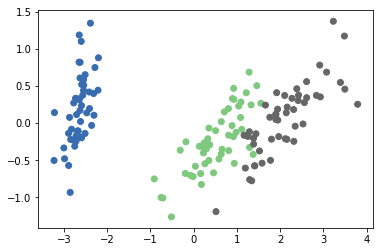

In [34]:
plt.scatter(X_iris_reduced[:, 0], X_iris_reduced[:, 1], c=y_iris, cmap=plt.cm.Accent);
ax.set_title('First two PCA directions')
ax.set_xlabel('1st eigenvector')
ax.set_ylabel('2nd eigenvector');

Sure enough, we've just reproduced the first plot of this [walkthrough](http://scikit-learn.org/stable/modules/decomposition.html#pca).

# Hierarchical Clustering

Let's try to discover a reasonable number of clusters from the data with hierarchical clustering. Source: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

## Simulated Data

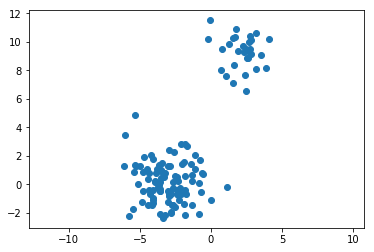

In [36]:
# multivariate_normal takes covariance matrices as second arg
a = (np.random.multivariate_normal([-3, 0], [[2, 0], [0, 2]], size=(100,)))
b = (np.random.multivariate_normal([2, 9], [[1, 0], [0, 1]], size=(30,)))
X = np.concatenate((a, b))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [37]:
print X.shape

(130, 2)


In [38]:
# Generate the linkage matrix (note to self: not sure what this is precisely)
Z = linkage(X, 'ward')

In [39]:
Z.shape

(129, 4)

In [40]:
np.set_printoptions(suppress=True)
Z[0:10, :]

array([[ 29.        ,  42.        ,   0.02330789,   2.        ],
       [120.        , 128.        ,   0.04337138,   2.        ],
       [ 25.        ,  92.        ,   0.04765508,   2.        ],
       [  4.        ,  64.        ,   0.07387485,   2.        ],
       [ 13.        ,  86.        ,   0.08020283,   2.        ],
       [ 55.        ,  77.        ,   0.08099026,   2.        ],
       [ 14.        , 132.        ,   0.08645782,   3.        ],
       [ 66.        ,  73.        ,   0.1036027 ,   2.        ],
       [ 44.        ,  90.        ,   0.10724582,   2.        ],
       [ 17.        ,  31.        ,   0.11436974,   2.        ]])

Each row of the linkage ouput is `[idx1, idx2, distance, sample_count]`. Each row represents an iteration!

From the above source:

What does 'ward' mean there and how does this actually work?

'Ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 'Ward' causes linkage() to use the **Ward variance minimization algorithm**.

A good default choice, but it never hurts to play around with some other common linkage methods like 'single', 'complete', 'average', ... and the different distance metrics like **'euclidean' (default)**, 'cityblock' aka Manhattan, 'hamming', 'cosine'... if you have the feeling that your data should not just be clustered to minimize the overall intra-cluster variance in euclidean space. For example, you should have such a weird feeling with long (binary) feature vectors (e.g., word-vectors in text clustering).

In [41]:
Z

array([[ 29.        ,  42.        ,   0.02330789,   2.        ],
       [120.        , 128.        ,   0.04337138,   2.        ],
       [ 25.        ,  92.        ,   0.04765508,   2.        ],
       [  4.        ,  64.        ,   0.07387485,   2.        ],
       [ 13.        ,  86.        ,   0.08020283,   2.        ],
       [ 55.        ,  77.        ,   0.08099026,   2.        ],
       [ 14.        , 132.        ,   0.08645782,   3.        ],
       [ 66.        ,  73.        ,   0.1036027 ,   2.        ],
       [ 44.        ,  90.        ,   0.10724582,   2.        ],
       [ 17.        ,  31.        ,   0.11436974,   2.        ],
       [  1.        ,  37.        ,   0.11610614,   2.        ],
       [ 12.        ,  99.        ,   0.11802196,   2.        ],
       [109.        , 112.        ,   0.11818143,   2.        ],
       [ 87.        ,  97.        ,   0.12908473,   2.        ],
       [ 57.        , 136.        ,   0.13026366,   4.        ],
       [ 27.        ,  53

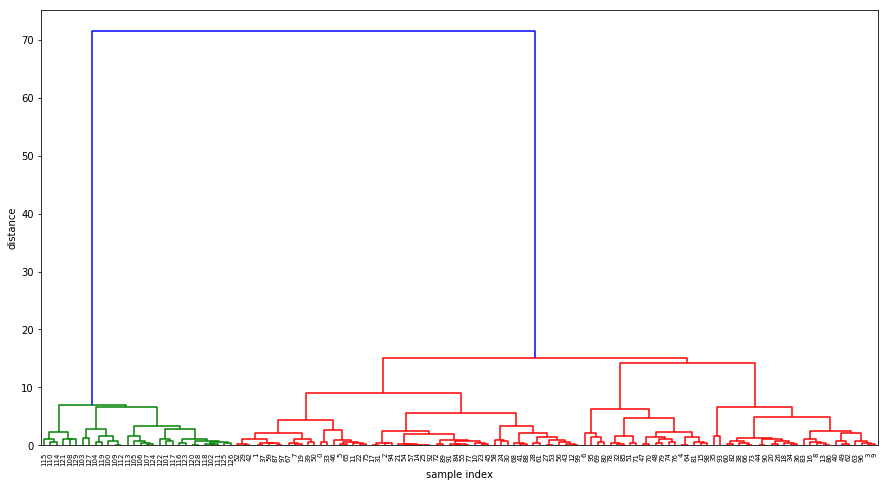

In [42]:
plt.figure(figsize=(15, 8))
# plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
           leaf_rotation=90.,
           leaf_font_size=7.,
)
plt.show()

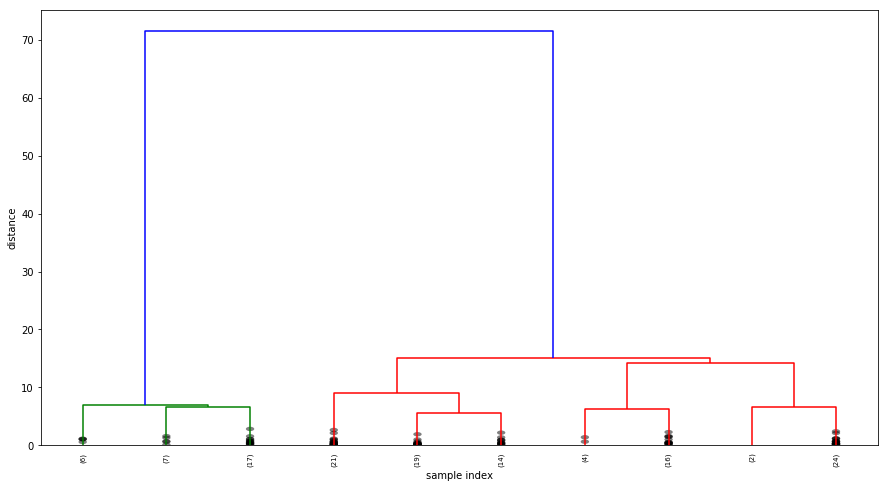

In [43]:
plt.figure(figsize=(15, 8))
# plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
           truncate_mode='lastp',
           p=10,
           leaf_rotation=90.,
           leaf_font_size=7.,
           show_contracted=True
)
plt.show()

### The elbow method: beware

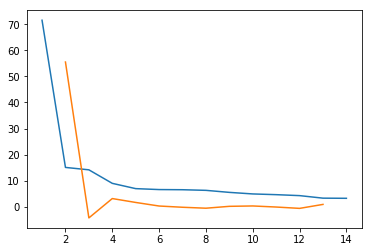

clusters: 2


In [44]:
last = Z[-14:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print "clusters:", k

## Getting Cluster IDs

In [45]:
from scipy.cluster.hierarchy import fcluster

### Using a cutoff distance

In [46]:
max_d = 50 # found manually with help from dendrogram
nclust1 = fcluster(Z, max_d, criterion='distance')
nclust1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

### Imposing a known or desired cluster number

In [47]:
nclust2 = fcluster(Z, 2, criterion='maxclust')# 2 clusters
nclust2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [48]:
nclust1 - nclust2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

# DBSCAN

Pro: we don't need to specify the number of clusters beforehand.
Con: Gaurav found that this crashes the fuck out of python for ~100k data points.

In [49]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [50]:
X_scaled = StandardScaler().fit_transform(X)

DBSCAN magic starts here.

In [51]:
db = DBSCAN(eps=0.3, min_samples=8).fit(X_scaled)

In [52]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [53]:
core_samples_mask[db.core_sample_indices_] = True

In [54]:
dblabels = db.labels_
dblabels

array([-1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1])

What is this, three clusters? We'll see and iterate if needed.

Oh wait, no: -1 indicates noise, apparently! So we're good.

In [55]:
nclust_db = len(set(labels)) - (1 if -1 in dblabels else 0)
nclust_db

2

Nice!

In [56]:
labels_true = nclust1

In [57]:
print 'Estimated number of clusters: %d' % nclust_db
print "Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, dblabels)
print "Completeness: %0.3f" % metrics.completeness_score(labels_true, dblabels)
print "V-measure: %0.3f" % metrics.v_measure_score(labels_true, dblabels)
print "Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, dblabels)
print "Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, dblabels)
print "Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, dblabels)

Estimated number of clusters: 2
Homogeneity: 0.783
Completeness: 0.503
V-measure: 0.612
Adjusted Rand Index: 0.685
Adjusted Mutual Information: 0.498
Silhouette Coefficient: 0.502


**TODO:** look up extreme and typically "good" values for these metrics.

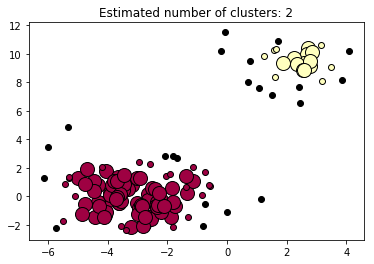

In [58]:
fig, ax = plt.subplots()
unique_labels = set(dblabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dblabels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % nclust_db)
plt.show()

# 4-dimensional example data

Let's try this:

1. Simulate 5D data (linearly separable for simplicity) using numpy multivariate_normal.
2. Run DBSCAN on it.
3. Run PCA. Do the first two principal directions look right?
4. Run clustering (I guess DBSCAN) along the first 3(?) principal components.

In [59]:
cov_a = np.array(\
[[1, 0.9, 0.5, 0], 
 [0.9, 1, 0.4, 0],
 [0.5, 0.4, 1, 0], 
 [0, 0, 0, 1]])

cov_b = np.array(\
[[1, 0.9, 0, 0.3], 
 [0.9, 1, 0, 0],
 [0, 0, 1, -0.4], 
 [0.3, 0, -0.4, 1]])

cov_c = np.array(\
[[1, -0.9, 0, -0.3], 
 [-0.9, 1, 0, 0],
 [0, 0, 1, 0], 
 [-0.3, 0, 0, 1]])

In [60]:
# multivariate_normal takes covariance matrices as second arg
a = (np.random.multivariate_normal(mean=[0, 1, 2, 3],
                                   cov=cov_a, 
                                   size=(100,)))
b = (np.random.multivariate_normal(mean=[3, 4, 5, 6], 
                                   cov=cov_b, 
                                   size=(50,)))
c = (np.random.multivariate_normal([7, 8, 0, 1],
                                   cov=cov_c,  
                                   size=(50,)))
X = np.concatenate((a, b, c))

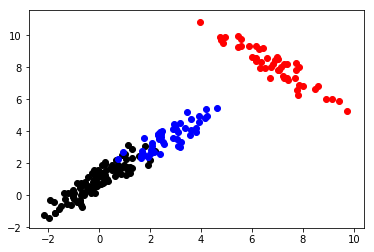

In [61]:
plt.scatter(a[:, 0], a[:, 1], color='k')
plt.scatter(b[:, 0], b[:, 1], color='b')
plt.scatter(c[:, 0], c[:, 1], color='r')

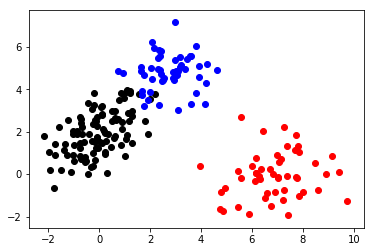

In [62]:
plt.scatter(a[:, 0], a[:, 2], color='k')
plt.scatter(b[:, 0], b[:, 2], color='b')
plt.scatter(c[:, 0], c[:, 2], color='r')

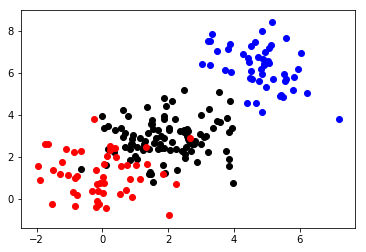

In [63]:
plt.scatter(a[:, 2], a[:, 3], color='k')
plt.scatter(b[:, 2], b[:, 3], color='b')
plt.scatter(c[:, 2], c[:, 3], color='r')

I tried and somewhat succeeded in hacking together a toy example with some noticeable linear correlations in it. Let's see if PCA pulls something cool out of this.

In [64]:
pca = PCA(n_components=2)

In [65]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.sum()

[0.69929878 0.23291274]
0.9322115214655102


Okay, the first two principal components still explain the majority of variance, just not quite as dramatically as in the 2D example we started with. This is to be expected, since I didn't put much effort into designing this 5D example around any given linear relationship.

In [67]:
# Eigenvalues
print pca.singular_values_

[61.52844125 35.5092212 ]


In [68]:
# Eigenvectors
print pca.components_

[[ 0.66407757  0.69263603 -0.20300419 -0.19505284]
 [ 0.20813762  0.18972186  0.65010496  0.70572508]]


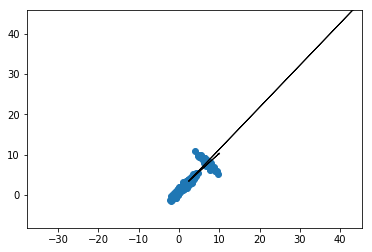

In [69]:
# Graphical sanity check
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
x0 = X[:,0].mean()
y0 = X[:,1].mean()
for sv, c in zip(pca.singular_values_, pca.components_):
    cx = c[0]*sv  
    cy = c[1]*sv
    ax.arrow(x0, y0, cx, cy, head_width=0.3)
plt.axis('equal')
# My terrible plot code assumes negative minimum values.
ax.set_ylim(4*ax.get_ylim()[0], 4*ax.get_ylim()[1]);

# Estimate epsilon for DBSCAN using KNN

In [70]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=4).fit(X)
distances, indices = nbrs.kneighbors(X)

In [71]:
distances[:10, :]

array([[0.        , 0.50117124, 0.71756004, 0.78235323],
       [0.        , 0.75866063, 0.78951751, 0.79699628],
       [0.        , 1.06678218, 1.14136628, 1.35629844],
       [0.        , 0.52383233, 0.61585279, 0.70003083],
       [0.        , 0.85481393, 1.29267593, 1.3355837 ],
       [0.        , 0.75682904, 0.77828341, 1.03620733],
       [0.        , 0.39015736, 0.6826242 , 0.77893007],
       [0.        , 0.25325801, 0.46448893, 0.58584135],
       [0.        , 0.7261161 , 0.73762602, 1.25061594],
       [0.        , 1.10348628, 1.31287591, 1.39822899]])

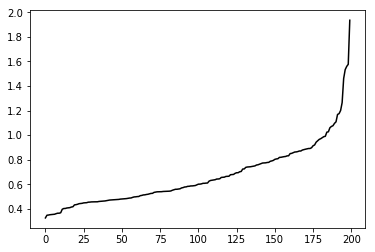

In [72]:
plt.plot(sorted(distances.mean(axis=1)), color='k');

Looks like the "knee" in both lines starts taking off y = 0.5, very roughly. So let's set EPS to that in the next cells.

# DBSCAN on fake data

In [73]:
X_scaled = StandardScaler().fit_transform(X)

In [74]:
db = DBSCAN(eps=0.5, min_samples=5.3).fit(X_scaled)

In [75]:
db.labels_

array([ 0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  2,  2, -1,
       -1, -1,  2, -1, -1, -1,  2,  2,  2, -1, -1,  2,  2, -1,  2,  2, -1,
        2,  2,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2, -1,  2, -1, -1,  2,
       -1, -1,  2, -1,  2,  2,  2,  2, -1, -1,  2,  2, -1])

In [76]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [77]:
core_samples_mask[db.core_sample_indices_] = True

In [78]:
dblabels = db.labels_
dblabels

array([ 0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  2,  2, -1,
       -1, -1,  2, -1, -1, -1,  2,  2,  2, -1, -1,  2,  2, -1,  2,  2, -1,
        2,  2,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2, -1,  2, -1, -1,  2,
       -1, -1,  2, -1,  2,  2,  2,  2, -1, -1,  2,  2, -1])

In [79]:
nclust_db = len(set(dblabels)) - (1 if -1 in dblabels else 0)
nclust_db

3

In [80]:
labels_true = np.array([0]*100 + [1]*50 + [2]*50)

In [81]:
print 'Estimated number of clusters: %d' % nclust_db
print "Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, dblabels)
print "Completeness: %0.3f" % metrics.completeness_score(labels_true, dblabels)
print "V-measure: %0.3f" % metrics.v_measure_score(labels_true, dblabels)
print "Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, dblabels)
print "Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, dblabels)
print "Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, dblabels)

Estimated number of clusters: 3
Homogeneity: 0.743
Completeness: 0.592
V-measure: 0.659
Adjusted Rand Index: 0.625
Adjusted Mutual Information: 0.587
Silhouette Coefficient: 0.341


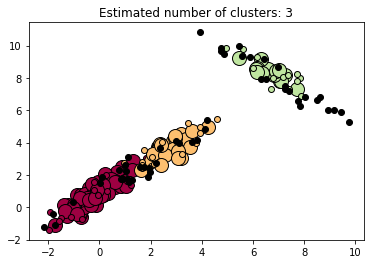

In [82]:
fig, ax = plt.subplots()
unique_labels = set(dblabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dblabels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % nclust_db)
plt.show()

---

# Facets Dive

The following is boilerplate straight from and `facets_dive/Dive_demo.ipynb`.

In [83]:
# Adapted from venkatesh-1729's answer to https://github.com/PAIR-code/facets/issues/15
jsonstr = pd.DataFrame(iris.data, columns=iris.feature_names).to_json(orient='records')

# Display the Dive visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))